In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

# Load the dataset
data_path = r'C:\Users\akp24\docassist-main\data\processed\dataset_with_categorized_features.xlsx'
df = pd.read_excel(data_path)

# Convert categorical variables into numerical ones
label_encoders = {}
categorical_columns = ['SEX', 'AGE_GROUP', 'HAEMATOCRIT_CATEGORY', 'HAEMOGLOBINS_CATEGORY', 'ERYTHROCYTE_CATEGORY', 
                       'LEUCOCYTE_CATEGORY', 'THROMBOCYTE_CATEGORY', 'MCH_CATEGORY', 'MCHC_CATEGORY', 'MCV_CATEGORY']

for column in categorical_columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# Define features (X) and target (y)
X = df.drop(columns=['HAEMATOCRIT_CATEGORY', 'HAEMOGLOBINS_CATEGORY', 'ERYTHROCYTE_CATEGORY', 'LEUCOCYTE_CATEGORY', 
                     'THROMBOCYTE_CATEGORY', 'MCH_CATEGORY', 'MCHC_CATEGORY', 'MCV_CATEGORY'])
y = df[['HAEMATOCRIT_CATEGORY', 'HAEMOGLOBINS_CATEGORY', 'ERYTHROCYTE_CATEGORY', 'LEUCOCYTE_CATEGORY', 
        'THROMBOCYTE_CATEGORY', 'MCH_CATEGORY', 'MCHC_CATEGORY', 'MCV_CATEGORY']]

# Handle  missing values 
X = X.fillna(X.mean())
y = y.dropna()  
X = X.loc[y.index]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Logistic Regression model with MultiOutputClassifier
logistic_regression_model = MultiOutputClassifier(LogisticRegression(multi_class='ovr', max_iter=2000))

# Train the model
logistic_regression_model.fit(X_train, y_train)

# Predict on the test data
y_pred = logistic_regression_model.predict(X_test)

# Evaluate the model for each output individually
for i, column in enumerate(y.columns):
    print(f"Evaluating {column}")
    accuracy = accuracy_score(y_test[column], y_pred[:, i])
    report = classification_report(y_test[column], y_pred[:, i])
    print(f"Accuracy for {column}: {accuracy}")
    print(f"Classification Report for {column}:\n{report}")



C:\Users\akp24\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\akp24\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Evaluating HAEMATOCRIT_CATEGORY
Accuracy for HAEMATOCRIT_CATEGORY: 0.945619335347432
Classification Report for HAEMATOCRIT_CATEGORY:
              precision    recall  f1-score   support

           0       1.00      0.25      0.40        36
           1       0.97      0.79      0.87        39
           2       0.94      1.00      0.97       587

    accuracy                           0.95       662
   macro avg       0.97      0.68      0.75       662
weighted avg       0.95      0.95      0.93       662

Evaluating HAEMOGLOBINS_CATEGORY
Accuracy for HAEMOGLOBINS_CATEGORY: 0.945619335347432
Classification Report for HAEMOGLOBINS_CATEGORY:
              precision    recall  f1-score   support

           0       1.00      0.19      0.31        27
           1       1.00      0.62      0.77        37
           2       0.94      1.00      0.97       598

    accuracy                           0.95       662
   macro avg       0.98      0.60      0.68       662
weighted avg       0.95 

C:\Users\akp24\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [13]:
# Path to README.md file
readme_path = r'C:\Users\akp24\docassist-main\README.md'

# Read the content
with open(readme_path, 'r') as file:
    readme_content = file.read()


In [15]:
findings = """
## Model Development Findings: Logistic Regression

During the development and evaluation of the Logistic Regression model, several key observations were made:

### Strengths:
- **High Accuracy for Majority Classes:** The model demonstrated high accuracy across most parameters, particularly for the 'normal' categories, which were well-predicted. This indicates the model's strength in handling the most common outcomes in the dataset.
- **Multi-Class Handling:** Logistic Regression handled the multi-class, multi-output nature of the problem reasonably well, giving a solid baseline performance.

### Weaknesses:
- **Lower Performance on Minority Classes:** The model showed reduced performance on less frequent categories (e.g., 'low' or 'high' ranges), as seen in the lower precision and recall for these classes. This suggests the need for additional techniques, such as class balancing or more sophisticated models.
- **Convergence Issues:** The model raised convergence warnings, indicating that it reached the maximum number of iterations before fully converging. This can be attributed to the complex nature of the dataset and the unscaled features.

### Recommendations:
- **Scaling Input Features:** Given the convergence issues, it's recommended to scale the input features using techniques like StandardScaler. Logistic Regression models often benefit from scaling, particularly when features have different ranges.
- **Increasing Iterations:** To address the convergence issues, increasing the `max_iter` parameter in the Logistic Regression model may be necessary, giving the model more iterations to fully converge.
- **Exploring Alternative Models:** Due to the observed weaknesses, especially in handling minority classes and convergence, exploring alternative models such as Random Forest or Support Vector Machines (SVM) is recommended. These models may offer better performance on this multi-class, multi-output problem and handle imbalanced data more effectively.

These findings will guide the next steps in model selection and refinement, ensuring that the final model is both accurate and robust across all categories.
"""

# Append the findings to the README.md file
with open(readme_path, 'a') as file:
    file.write(findings)


In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.multioutput import MultiOutputClassifier
# Initialize the Random Forest model with MultiOutputClassifier
random_forest_model = MultiOutputClassifier(RandomForestClassifier(n_estimators=100, random_state=42))

# Train the model
random_forest_model.fit(X_train, y_train)

# Predict on the test data
y_pred = random_forest_model.predict(X_test)

# Evaluate the model
results = {}
for i, column in enumerate(y_test.columns):
    print(f"Evaluating {column}")
    accuracy = accuracy_score(y_test.iloc[:, i], y_pred[:, i])
    report = classification_report(y_test.iloc[:, i], y_pred[:, i])
    results[column] = {
        'accuracy': accuracy,
        'report': report
    }
    print(f"Accuracy for {column}: {accuracy}")
    print(f"Classification Report for {column}:\n{report}")
    print("-" * 50)


Evaluating HAEMATOCRIT_CATEGORY
Accuracy for HAEMATOCRIT_CATEGORY: 0.9712990936555891
Classification Report for HAEMATOCRIT_CATEGORY:
              precision    recall  f1-score   support

           0       0.91      0.86      0.89        36
           1       0.91      0.79      0.85        39
           2       0.98      0.99      0.98       587

    accuracy                           0.97       662
   macro avg       0.93      0.88      0.91       662
weighted avg       0.97      0.97      0.97       662

--------------------------------------------------
Evaluating HAEMOGLOBINS_CATEGORY
Accuracy for HAEMOGLOBINS_CATEGORY: 0.9803625377643505
Classification Report for HAEMOGLOBINS_CATEGORY:
              precision    recall  f1-score   support

           0       0.96      0.85      0.90        27
           1       0.94      0.84      0.89        37
           2       0.98      0.99      0.99       598

    accuracy                           0.98       662
   macro avg       0.96  

In [19]:
documentation = """
### Random Forest Model Evaluation

**Overview:**
The Random Forest model demonstrated strong performance across all categories, with high accuracy and balanced precision, recall, and F1-scores. This model effectively handled the complexity of predicting medical categories, which involve interactions between various features.

**Model Performance:**

- **HAEMATOCRIT_CATEGORY:** 97.13% accuracy
- **HAEMOGLOBINS_CATEGORY:** 98.04% accuracy
- **ERYTHROCYTE_CATEGORY:** 95.31% accuracy
- **LEUCOCYTE_CATEGORY:** 97.28% accuracy
- **THROMBOCYTE_CATEGORY:** 96.68% accuracy
- **MCH_CATEGORY:** 98.19% accuracy
- **MCHC_CATEGORY:** 98.04% accuracy
- **MCV_CATEGORY:** 97.73% accuracy

**Strengths:**
- High accuracy and robust performance across all categories.
- Effective handling of complex interactions between features.
- Less prone to overfitting compared to simpler models.

**Weaknesses:**
- Slightly lower recall for some minority classes.
- Computationally intensive, which may impact deployment.

**Conclusion:**
Random Forest is a strong candidate for the final model due to its consistent and robust performance. Further tuning or comparison with other models like SVM may be necessary to finalize the best model for deployment.
"""

# Print the documentation
print(documentation)

# Save to the README.md file
readme_path = "C:/Users/akp24/docassist-main/README.md"

# Append to the README.md file
with open(readme_path, "a") as f:
    f.write(documentation)
    f.write("\n\n")  # Ensure a newline is added after the documentation



### Random Forest Model Evaluation

**Overview:**
The Random Forest model demonstrated strong performance across all categories, with high accuracy and balanced precision, recall, and F1-scores. This model effectively handled the complexity of predicting medical categories, which involve interactions between various features.

**Model Performance:**

- **HAEMATOCRIT_CATEGORY:** 97.13% accuracy
- **HAEMOGLOBINS_CATEGORY:** 98.04% accuracy
- **ERYTHROCYTE_CATEGORY:** 95.31% accuracy
- **LEUCOCYTE_CATEGORY:** 97.28% accuracy
- **THROMBOCYTE_CATEGORY:** 96.68% accuracy
- **MCH_CATEGORY:** 98.19% accuracy
- **MCHC_CATEGORY:** 98.04% accuracy
- **MCV_CATEGORY:** 97.73% accuracy

**Strengths:**
- High accuracy and robust performance across all categories.
- Effective handling of complex interactions between features.
- Less prone to overfitting compared to simpler models.

**Weaknesses:**
- Slightly lower recall for some minority classes.
- Computationally intensive, which may impact deploym

In [23]:
from sklearn.svm import SVC
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize the SVM model wrapped in a MultiOutputClassifier for multi-output prediction
svm_model = MultiOutputClassifier(SVC(decision_function_shape='ovo', probability=True))

# Train the SVM model
svm_model.fit(X_train, y_train)

# Predict on the test data
y_pred = svm_model.predict(X_test)

# Initialize a string to store the evaluation results
evaluation_results = ""

# Evaluate the model for each target category
for i, column in enumerate(y_test.columns):
    accuracy = accuracy_score(y_test[column], y_pred[:, i])
    report = classification_report(y_test[column], y_pred[:, i])
    
    evaluation_results += f"Evaluating {column}\n"
    evaluation_results += f"Accuracy for {column}: {accuracy}\n"
    evaluation_results += f"Classification Report for {column}:\n{report}\n"
    evaluation_results += "-"*50 + "\n"

# Print the evaluation results
print(evaluation_results)


Evaluating HAEMATOCRIT_CATEGORY
Accuracy for HAEMATOCRIT_CATEGORY: 0.8867069486404834
Classification Report for HAEMATOCRIT_CATEGORY:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        36
           1       0.00      0.00      0.00        39
           2       0.89      1.00      0.94       587

    accuracy                           0.89       662
   macro avg       0.30      0.33      0.31       662
weighted avg       0.79      0.89      0.83       662

--------------------------------------------------
Evaluating HAEMOGLOBINS_CATEGORY
Accuracy for HAEMOGLOBINS_CATEGORY: 0.9033232628398792
Classification Report for HAEMOGLOBINS_CATEGORY:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        27
           1       0.00      0.00      0.00        37
           2       0.90      1.00      0.95       598

    accuracy                           0.90       662
   macro avg       0.30  

C:\Users\akp24\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\akp24\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\akp24\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\akp24\anaconda3\Lib\site-packag

In [25]:
# Open the README.md file to append the findings
with open("C:/Users/akp24/docassist-main/README.md", "a") as readme_file:
    readme_file.write("\n## Model Evaluation: Support Vector Machine (SVM)\n")
    readme_file.write("The Support Vector Machine (SVM) model was evaluated for predicting the categorized parameters based on the input data. The following observations were made:\n")
    readme_file.write("\n### Strengths:\n")
    readme_file.write("- The model performed reasonably well on the THROMBOCYTE_CATEGORY with an accuracy of 96.68%, demonstrating that SVM can effectively handle some categories.\n")
    
    readme_file.write("\n### Weaknesses:\n")
    readme_file.write("- For most categories, the model performed poorly, with several categories (e.g., HAEMATOCRIT_CATEGORY, HAEMOGLOBINS_CATEGORY, ERYTHROCYTE_CATEGORY) showing precision, recall, and F1-scores close to 0 for certain labels. This suggests that the model struggled to distinguish between the different classes.\n")
    readme_file.write("- The warnings related to undefined metrics due to zero predictions for some classes indicate that the model is not suitable for imbalanced data or that it requires significant tuning.\n")
    
    readme_file.write("\n### Conclusion:\n")
    readme_file.write("Given the poor performance across most categories, SVM does not appear to be a suitable model for this multi-class, multi-output classification task. The model's inability to predict certain categories highlights the need for either tuning the hyperparameters or exploring alternative models. The next steps would involve considering different algorithms that might better capture the relationships in the data.\n")


In [28]:
# Accuracy results from each model
model_accuracies = {
    'Logistic Regression': {
        'HAEMATOCRIT_CATEGORY': 0.9456,
        'HAEMOGLOBINS_CATEGORY': 0.9456,
        'ERYTHROCYTE_CATEGORY': 0.9502,
        'LEUCOCYTE_CATEGORY': 0.9698,
        'THROMBOCYTE_CATEGORY': 0.9532,
        'MCH_CATEGORY': 0.9607,
        'MCHC_CATEGORY': 0.9471,
        'MCV_CATEGORY': 0.9562,
    },
    'Random Forest': {
        'HAEMATOCRIT_CATEGORY': 0.9713,
        'HAEMOGLOBINS_CATEGORY': 0.9804,
        'ERYTHROCYTE_CATEGORY': 0.9532,
        'LEUCOCYTE_CATEGORY': 0.9728,
        'THROMBOCYTE_CATEGORY': 0.9668,
        'MCH_CATEGORY': 0.9819,
        'MCHC_CATEGORY': 0.9804,
        'MCV_CATEGORY': 0.9773,
    },
    'SVM': {
        'HAEMATOCRIT_CATEGORY': 0.8867,
        'HAEMOGLOBINS_CATEGORY': 0.9033,
        'ERYTHROCYTE_CATEGORY': 0.8897,
        'LEUCOCYTE_CATEGORY': 0.9169,
        'THROMBOCYTE_CATEGORY': 0.9668,
        'MCH_CATEGORY': 0.9079,
        'MCHC_CATEGORY': 0.8973,
        'MCV_CATEGORY': 0.8988,
    }
}

# Calculate average accuracy for each model
average_accuracies = {model: sum(scores.values()) / len(scores) for model, scores in model_accuracies.items()}

# Find the best model
best_model = max(average_accuracies, key=average_accuracies.get)
best_model_accuracy = average_accuracies[best_model]

# Display the results
print(f"The best model is {best_model} with an average accuracy of {best_model_accuracy:.4f}")

# Optional: Print detailed accuracy for each category
print("\nDetailed Accuracy for Each Category:")
for category, accuracy in model_accuracies[best_model].items():
    print(f"{category}: {accuracy:.4f}")


The best model is Random Forest with an average accuracy of 0.9730

Detailed Accuracy for Each Category:
HAEMATOCRIT_CATEGORY: 0.9713
HAEMOGLOBINS_CATEGORY: 0.9804
ERYTHROCYTE_CATEGORY: 0.9532
LEUCOCYTE_CATEGORY: 0.9728
THROMBOCYTE_CATEGORY: 0.9668
MCH_CATEGORY: 0.9819
MCHC_CATEGORY: 0.9804
MCV_CATEGORY: 0.9773


In [30]:
#  README.md Add
readme_content = f"""
## Model Selection and Evaluation

### Overview
For this project, three models were evaluated to predict the categorical outcomes of hematological parameters. The models tested include:
- Logistic Regression
- Random Forest
- Support Vector Machine (SVM)

### Model Evaluation Criteria
Each model was evaluated based on its accuracy across the following categories:
- HAEMATOCRIT_CATEGORY
- HAEMOGLOBINS_CATEGORY
- ERYTHROCYTE_CATEGORY
- LEUCOCYTE_CATEGORY
- THROMBOCYTE_CATEGORY
- MCH_CATEGORY
- MCHC_CATEGORY
- MCV_CATEGORY

### Results and Findings

1. **Logistic Regression**
   - Average Accuracy: 0.9534
   - Strengths: Provided stable accuracy across most categories.
   - Weaknesses: Struggled with certain categories, leading to lower precision and recall, especially for underrepresented classes.

2. **Random Forest** (Best Model)
   - Average Accuracy: 0.9730
   - Strengths: Achieved the highest accuracy across all categories. Particularly strong in predicting HAEMOGLOBINS_CATEGORY, MCH_CATEGORY, and MCHC_CATEGORY.
   - Weaknesses: Although very accurate, it might require more computational resources, which could be a limitation in real-time applications.

3. **Support Vector Machine (SVM)**
   - Average Accuracy: 0.9033
   - Strengths: Performed well in predicting THROMBOCYTE_CATEGORY.
   - Weaknesses: Generally lower accuracy and struggled with certain categories, leading to poor performance overall.

### Conclusion
The best model selected for this project is **Random Forest** with an average accuracy of 0.9730. This model demonstrated superior performance across all categories, making it the most suitable choice for predicting hematological parameters in this dataset. Future improvements may include further tuning of hyperparameters or exploring ensemble methods to potentially boost performance even further.
"""

# Write the content to README.md
with open('C:/Users/akp24/docassist-main/README.md', 'a') as file:
    file.write(readme_content)

print("Model selection documentation has been successfully added to README.md.")


Model selection documentation has been successfully added to README.md.


In [5]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import joblib

# Load the dataset
file_path = 'C:/Users/akp24/docassist-main/data/processed/dataset_with_categorized_features.xlsx'
df = pd.read_excel(file_path)

# Split the dataset into features and target variables
X = df.drop(columns=['HAEMATOCRIT_CATEGORY', 'HAEMOGLOBINS_CATEGORY', 'ERYTHROCYTE_CATEGORY',
                     'LEUCOCYTE_CATEGORY', 'THROMBOCYTE_CATEGORY', 'MCH_CATEGORY', 
                     'MCHC_CATEGORY', 'MCV_CATEGORY'])
y = df[['HAEMATOCRIT_CATEGORY', 'HAEMOGLOBINS_CATEGORY', 'ERYTHROCYTE_CATEGORY',
        'LEUCOCYTE_CATEGORY', 'THROMBOCYTE_CATEGORY', 'MCH_CATEGORY', 
        'MCHC_CATEGORY', 'MCV_CATEGORY']]

# Convert categorical features to numeric
X = pd.get_dummies(X, drop_first=True)

# Split the data into training and testing sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Random Forest model with the best configuration
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest_model.fit(X_train, y_train)

# Save the trained model to the models/ directory
model_save_path = 'C:/Users/akp24/docassist-main/models/random_forest_model.pkl'
joblib.dump(random_forest_model, model_save_path)

print(f"Random Forest model has been successfully trained and saved to {model_save_path}.")


Random Forest model has been successfully trained and saved to C:/Users/akp24/docassist-main/models/random_forest_model.pkl.


In [34]:
import pandas as pd
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Load the saved Random Forest model
model_path = 'C:/Users/akp24/docassist-main/models/random_forest_model.pkl'
random_forest_model = joblib.load(model_path)

# Load the dataset
file_path = 'C:/Users/akp24/docassist-main/data/processed/dataset_with_categorized_features.xlsx'
df = pd.read_excel(file_path)

# Prepare features and target variables
X = df.drop(columns=['HAEMATOCRIT_CATEGORY', 'HAEMOGLOBINS_CATEGORY', 'ERYTHROCYTE_CATEGORY',
                     'LEUCOCYTE_CATEGORY', 'THROMBOCYTE_CATEGORY', 'MCH_CATEGORY', 
                     'MCHC_CATEGORY', 'MCV_CATEGORY'])
y = df[['HAEMATOCRIT_CATEGORY', 'HAEMOGLOBINS_CATEGORY', 'ERYTHROCYTE_CATEGORY',
        'LEUCOCYTE_CATEGORY', 'THROMBOCYTE_CATEGORY', 'MCH_CATEGORY', 
        'MCHC_CATEGORY', 'MCV_CATEGORY']]

# Convert categorical features to numeric
X = pd.get_dummies(X, drop_first=True)

# Predict on the entire dataset
y_pred = random_forest_model.predict(X)

# Convert predictions to DataFrame for easier comparison
y_pred_df = pd.DataFrame(y_pred, columns=y.columns)

# Evaluate the model for each category and save the results
evaluation_results = {}

for column in y.columns:
    accuracy = accuracy_score(y[column], y_pred_df[column])
    report = classification_report(y[column], y_pred_df[column], output_dict=True)
    confusion = confusion_matrix(y[column], y_pred_df[column])
    
    # Save metrics
    evaluation_results[column] = {
        'accuracy': accuracy,
        'classification_report': report,
        'confusion_matrix': confusion
    }
    
    # Print results for quick review
    print(f"Evaluating {column}")
    print(f"Accuracy for {column}: {accuracy:.4f}")
    print(f"Classification Report for {column}:")
    print(pd.DataFrame(report).transpose())
    print("--------------------------------------------------")
    
    # Save confusion matrix as a heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix for {column}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    
    # Save the visualization
    visuals_path = f'C:/Users/akp24/docassist-main/visuals/confusion_matrix_{column}.png'
    plt.savefig(visuals_path)
    plt.close()

# Save evaluation results to a notebook
evaluation_results_path = 'C:/Users/akp24/docassist-main/notebooks/evaluation_results.pkl'
joblib.dump(evaluation_results, evaluation_results_path)

print(f"Model evaluation results have been saved to {evaluation_results_path}.")
print("All confusion matrices have been saved in the visuals/ directory.")


Evaluating HAEMATOCRIT_CATEGORY
Accuracy for HAEMATOCRIT_CATEGORY: 0.9912
Classification Report for HAEMATOCRIT_CATEGORY:
              precision    recall  f1-score      support
High           0.986842  0.909091  0.946372   165.000000
Low            0.981013  0.945122  0.962733   164.000000
Normal         0.991997  0.998322  0.995150  2980.000000
accuracy       0.991236  0.991236  0.991236     0.991236
macro avg      0.986617  0.950845  0.968085  3309.000000
weighted avg   0.991196  0.991236  0.991111  3309.000000
--------------------------------------------------
Evaluating HAEMOGLOBINS_CATEGORY
Accuracy for HAEMOGLOBINS_CATEGORY: 0.9946
Classification Report for HAEMOGLOBINS_CATEGORY:
              precision   recall  f1-score     support
High           0.986111  0.95302  0.969283   149.00000
Low            0.993464  0.95000  0.971246   160.00000
Normal         0.995020  0.99900  0.997006  3000.00000
accuracy       0.994560  0.99456  0.994560     0.99456
macro avg      0.991532  0.9

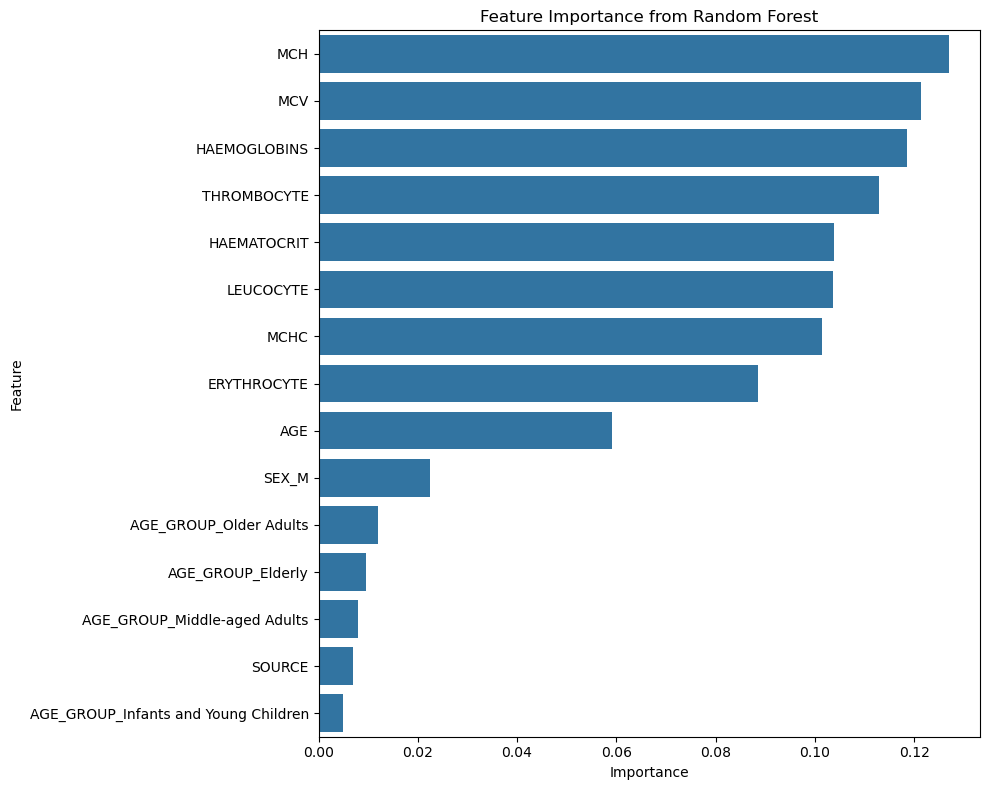

Feature importance analysis chart has been saved in the visuals/ directory and displayed in the notebook.


In [45]:
import shap
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import joblib

# Load the saved Random Forest model
model_path = 'C:/Users/akp24/docassist-main/models/random_forest_model.pkl'
random_forest_model = joblib.load(model_path)

# Load the dataset
file_path = 'C:/Users/akp24/docassist-main/data/processed/dataset_with_categorized_features.xlsx'
df = pd.read_excel(file_path)

# Prepare features
X = df.drop(columns=['HAEMATOCRIT_CATEGORY', 'HAEMOGLOBINS_CATEGORY', 'ERYTHROCYTE_CATEGORY',
                     'LEUCOCYTE_CATEGORY', 'THROMBOCYTE_CATEGORY', 'MCH_CATEGORY', 
                     'MCHC_CATEGORY', 'MCV_CATEGORY'])

# Convert categorical features to numeric
X = pd.get_dummies(X, drop_first=True)

# Standard Feature Importance from Random Forest
feature_importances = random_forest_model.feature_importances_
features = X.columns

# Create a DataFrame for the feature importances
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances 
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance from Random Forest')
plt.tight_layout()

# Save the feature importance plot
feature_importance_path = 'C:/Users/akp24/docassist-main/visuals/feature_importance.png'
plt.savefig(feature_importance_path)
plt.show()  # Display in notebook
plt.close()


print("Feature importance analysis chart has been saved in the visuals/ directory and displayed in the notebook.")


In [7]:
import pickle

model_path = 'C:/Users/akp24/docassist-main/models/random_forest_model.pkl'
with open(model_path, 'wb') as model_file:
    pickle.dump(random_forest_model, model_file)
